In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gan = np.load('../../experiments/runs/EXP_run_Feb252020_rayBest/train_mse.npy')
l2 = np.load('../../experiments/runs/EXP_run_Feb252020_L2Compare/train_mse.npy')
l1 = np.load('../../experiments/runs/EXP_run_Feb252020_L1Compare/train_mse.npy')
huber = np.load('../../experiments/runs/EXP_run_Feb252020_SmoothL1Compare/train_mse.npy')

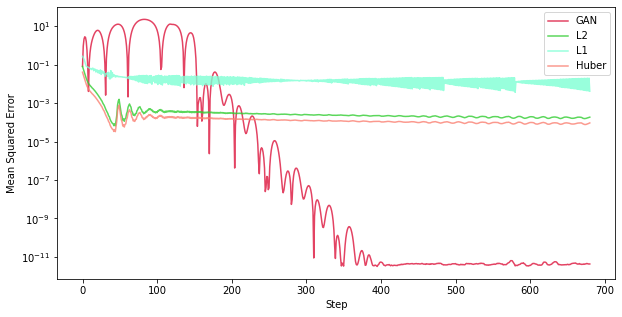

In [25]:
steps = np.arange(len(gan))
a = 0.8
plt.figure(figsize=(10,5))
plt.plot(steps, gan, label='GAN', color='crimson', alpha=a)
plt.plot(steps, l2, label='L2', color='limegreen', alpha=a)
plt.plot(steps, l1, label='L1', color='aquamarine', alpha=a)
plt.plot(steps, huber, label='Huber', color='salmon', alpha=a)
plt.legend()
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error');

In [45]:
gan_reps = np.load('../../denn/exp_rand_reps.npy')
l2_reps = np.load('../../denn/exp_rand_reps_L2.npy')
l1_reps = np.load('../../denn/exp_rand_reps_L1.npy')
huber_reps = np.load('../../denn/exp_rand_reps_smoothL1.npy')

In [60]:
np.argmin(gan_reps[:,-1])

5

In [3]:
import denn.utils

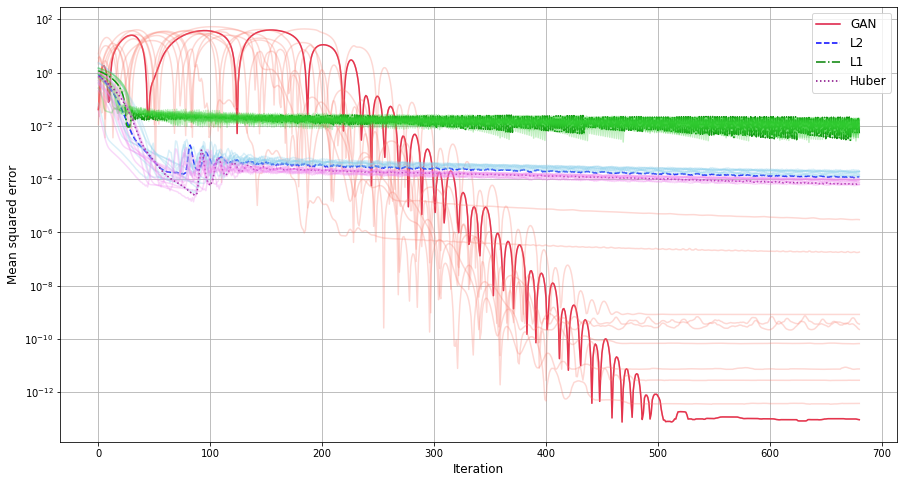

In [78]:
plt.figure(figsize=(15,8))
plt.yscale('log')

a=0.3

# gan
plt.plot(steps, gan_reps[np.argmin(gan_reps[:,-1]),:], 
         color='crimson', label='GAN', linestyle='solid')
for i in range(gan_reps.shape[0]):
    plt.plot(steps, gan_reps[i,:], alpha=a, color='salmon')
    
# L2
plt.plot(steps, l2_reps[np.argmin(l2_reps[:,-1]),:], 
         color='blue', label='L2', linestyle='dashed')
for i in range(l2_reps.shape[0]):
    plt.plot(steps, l2_reps[i, :], alpha=a, color='skyblue')
    
# L1
plt.plot(steps, l1_reps[np.argmin(l1_reps[:,-1]),:], 
         color='green', label='L1', linestyle='dashdot')
for i in range(l1_reps.shape[0]):
    plt.plot(steps, l1_reps[i, :], alpha=a, color='limegreen')
    
# Huber
plt.plot(steps, huber_reps[np.argmin(huber_reps[:,-1]),:], 
         color='purple', label='Huber', linestyle='dotted')
for i in range(huber_reps.shape[0]):
    plt.plot(steps, huber_reps[i, :], alpha=a, color='violet')


plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Mean squared error')
plt.grid()
plt.savefig('exp_rand_reps.jpg');

# Only Change Perturb Randommness

In [29]:
gan_reps = np.load('../../experiments/reps/exp_gan_rand_reps_fixedmodels.npy')
l2_reps = np.load('../../experiments/reps/exp_l2_rand_reps_fixedmodels.npy')
l1_reps = np.load('../../experiments/reps/exp_l1_rand_reps_fixedmodels.npy')
huber_reps = np.load('../../experiments/reps/exp_huber_rand_reps_fixedmodels.npy')

steps = np.arange(gan_reps.shape[1])

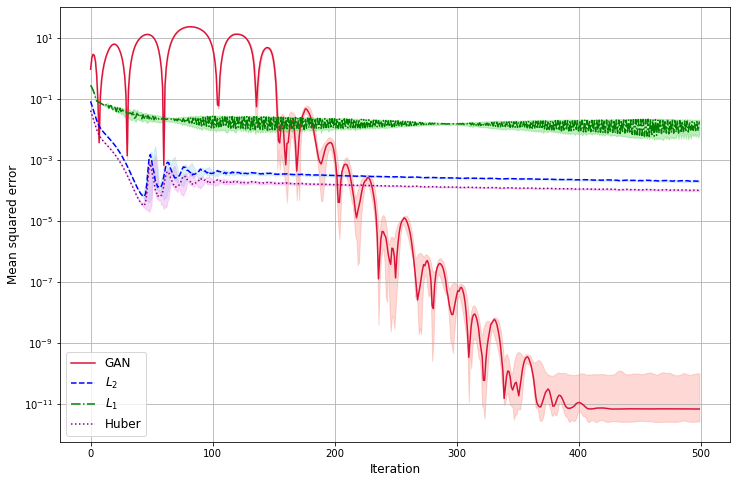

In [54]:
plt.figure(figsize=(12,8))
plt.yscale('log')

a=0.3
pctiles = (2.5, 97.5)

# gan
plt.plot(steps, np.median(gan_reps, axis=0), 
         color='crimson', label='GAN', linestyle='solid')
lqt, upt = np.percentile(gan_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='salmon', alpha=a)
# for i in range(gan_reps.shape[0]):
#     plt.plot(steps, gan_reps[i,:], alpha=a, color='salmon')
    
# L2
plt.plot(steps, np.median(l2_reps, axis=0), 
         color='blue', label='$L_2$', linestyle='dashed')
lqt, upt = np.percentile(l2_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='skyblue', alpha=a)
# for i in range(l2_reps.shape[0]):
#     plt.plot(steps, l2_reps[i, :], alpha=a, color='skyblue')
    
# L1
plt.plot(steps, np.median(l1_reps, axis=0), 
         color='green', label='$L_1$', linestyle='dashdot')
lqt, upt = np.percentile(l1_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='limegreen', alpha=a)
# for i in range(l1_reps.shape[0]):
#     plt.plot(steps, l1_reps[i, :], alpha=a, color='limegreen')
    
# Huber
plt.plot(steps, np.median(huber_reps, axis=0), 
         color='purple', label='Huber', linestyle='dotted')
lqt, upt = np.percentile(huber_reps, pctiles, axis=0)
plt.fill_between(steps, lqt, upt, color='violet', alpha=a)
# for i in range(huber_reps.shape[0]):
#     plt.plot(steps, huber_reps[i, :], alpha=a, color='violet')


plt.legend(loc='lower left')
plt.xlabel('Iteration')
plt.ylabel('Mean squared error')
plt.grid()
# plt.savefig('exp_rand_reps.jpg');